In [ ]:
pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.9 MB/s 
     |████████████████████████████████| 6.3 MB 35.8 MB/s 
     |████████████████████████████████| 1.0 MB 40.3 MB/s 
     |████████████████████████████████| 11.2 MB 39.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 40.6 MB/s 
     |████████████████████████████████| 16.7 MB 35.7 MB/s 
     |████████████████████████████████| 930 kB 57.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
import numpy as np
import librosa
import librosa.display
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import math

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import load_model

In [ ]:
loaded_model=load_model("/content/drive/MyDrive/data/trained_model50.hdf5")

In [ ]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 activation_13 (Activation)  (None, 100)               0         
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 activation_14 (Activation)  (None, 50)                0         
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 25)               

In [ ]:
folder_names=["pot_holes","regular_road","road_humps","wornout_road"]
columns_name=["time","acc-x","acc-y","acc-z","gyro-x","gyro-y","gyro-z","mag-x","mag-y","mag-z","speed","lat","lng"]
no_of_data_items={"pot_holes":71,"regular_road":291,"road_humps":120,"wornout_road":186}

In [ ]:
def read_file(filename): 
  df3=pd.read_csv(filename,names=columns_name)
  df3=df3.dropna()
  df3=df3.reset_index(drop=True)
  return df3

In [ ]:
def feature_extractor(file):
   k=read_file(file)
   k=k["acc-z"].values.flatten()
   if(len(k)>350):
     print(file)
   k=2.*(k - np.mean(9.8065))/np.ptp(k)-1
   mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
   return np.mean(mfccs.T,axis=0)

In [ ]:
segmented_data={}
for i in folder_names:
  l=[]
  for j in range(1,no_of_data_items[i]+1):
    data=feature_extractor("/content/drive/MyDrive/data/data2/"+i+"/ ("+str(j)+").csv")
    predected= data.reshape(1,-1)
    l.append(predected)
  segmented_data[i]=l

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=286
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=301
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=300
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=299
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=291
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=292
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

In [ ]:
count=0
label=0
for i,j in segmented_data.items():
  count=0
  accuracy=0
  for m in j:
    #print(count,i,(model.predict(m)>0.5).astype("int32")[0])
    if((loaded_model.predict(m)>0.5).astype("int32")[0][label]==1):
      accuracy+=1
    count+=1
  print(i,"Accuracy is ",accuracy,"/",count,"=",accuracy/count)
  label+=1

pot_holes Accuracy is  65 / 71 = 0.9154929577464789
regular_road Accuracy is  280 / 291 = 0.9621993127147767
road_humps Accuracy is  117 / 120 = 0.975
wornout_road Accuracy is  173 / 186 = 0.9301075268817204


In [ ]:
#Depricated
def route_type(m):
  if((loaded_model.predict(m)>0.4).astype("int32")[0][0]==1):
    return 10
  elif((loaded_model.predict(m)>0.4).astype("int32")[0][1]==1):
    return 2
  elif((loaded_model.predict(m)>0.4).astype("int32")[0][2]==1):
    return 8
  elif((loaded_model.predict(m)>0.4).astype("int32")[0][3]==1):
    return 15
  else:
    return 10

  

In [ ]:
def route_type(m):
  if((loaded_model.predict(m)>0.4).astype("int32")[0][0]==1):
    return 0
  elif((loaded_model.predict(m)>0.4).astype("int32")[0][1]==1):
    return 1
  elif((loaded_model.predict(m)>0.4).astype("int32")[0][2]==1):
    return 2
  elif((loaded_model.predict(m)>0.4).astype("int32")[0][3]==1):
    return 3
  else:
    return 1


In [ ]:
def location_extractor(file):
   k=read_file(file)
   lat=k['lat']
   lng=k['lng']
   l=[]
   l.append([lat[0],lng[0],0])
   for i in range(1,len(lat)):
     if(lat[i]!=lat[i-1] and lng[i]!=lng[i-1]):
        l.append([lat[i],lng[i],i])
   return l
   
   # [[lat,lng,index].....]

In [ ]:
def do_all_map_computation(path):
  locations=location_extractor(path)
  G = ox.graph_from_point((16.149464, 75.659329), dist=5000,dist_type="network",simplify=False,retain_all=True, network_type='drive')
  nodes=[]
  count=0
  flag=0
  previous=0
  lat1, lng1, lat2, lng2=0,0,0,0
  for i in locations:
    orig_point = (i[0], i[1])
    node_list ,distance_list= ox.nearest_nodes(G, [orig_point[1]],[orig_point[0]],return_dist=True)
    orig_node1=node_list[0]
    distance=0
    actual_distance=0
    lat1,lng1=i[0], i[1]
    if(lat2!=0 and lng2!=0):
      actual_distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
      #print(actual_distance)
    if(previous!=0):
      distance=nx.shortest_path_length(G,source=orig_node1,target=previous)
      #print(distance)
    if((distance<3 and actual_distance<100) and len(nodes)!=0):
      continue
    if(len(nodes)!=0 and orig_node1!=nodes[-1] and distance_list[0]<20):
      nodes.append([orig_node1,i[2]])
      previous=orig_node1
      lat2=lat1;
      lng2=lng1;
    elif(len(nodes)==0):
      nodes.append([orig_node1,i[2]])
      previous=orig_node1
      lat2=lat1;
      lng2=lng1;
  route=[]
  for i in range(1,len(nodes)):
    route+=nx.shortest_path(G, nodes[i-1][0], nodes[i][0])[:-1]
  return G,route,nodes


In [ ]:
G,route1,nodes1=do_all_map_computation("/content/drive/MyDrive/data/actualldata.csv")
#G,route2,nodes2=do_all_map_computation("/content/drive/MyDrive/data/data3.csv")

In [ ]:
nodes1

In [ ]:
#Depricated
def find_path_cost(x):
  n=len(x)//300
  flag=1
  remaining_data=[]
  if(len(x)%300>200):
    flag=0
    remaining_data=x[n*300:]
  path_peices=[]
  for i in range(0,n):
    path_peices.append(x[i*300:(i+1)*300])
  path_cost=0
  for i in path_peices:
    k=2.*(i - np.mean(9.8065))/np.ptp(i)-1
    mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
    i=np.mean(mfccs.T,axis=0)
    path_cost+=route_type(i.reshape(1,-1))
  if(flag==0):
    i=remaining_data
    k=2.*(i - np.mean(9.8065))/np.ptp(i)-1
    mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
    i=np.mean(mfccs.T,axis=0)
    path_cost+=route_type(i.reshape(1,-1))
  return path_cost




In [ ]:
def find_path_cost(x):
  path_data=[0,0,0,0]
  n=len(x)//300
  flag=1
  remaining_data=[]
  if(len(x)%300>200):
    flag=0
    remaining_data=x[n*300:]
  path_peices=[]
  for i in range(0,n):
    path_peices.append(x[i*300:(i+1)*300])
  for i in path_peices:
    k=2.*(i - np.mean(9.8065))/np.ptp(i)-1
    mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
    i=np.mean(mfccs.T,axis=0)
    p=route_type(i.reshape(1,-1))
    path_data[p]+=1
  if(flag==0):
    i=remaining_data
    k=2.*(i - np.mean(9.8065))/np.ptp(i)-1
    mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
    i=np.mean(mfccs.T,axis=0)
    p=route_type(i.reshape(1,-1))
    path_data[p]+=1
  return path_data


In [ ]:
def read_file_routes_data(file):
  k=read_file(file)
  z=k['acc-z']
  lat=k['lat']
  lng=k['lng']
  l=[]
  for i in range(len(z)):
    l.append([z[i],lat[i],lng[i]])
  return l

In [ ]:
#Depricated
def find_route_nodes(file):
  data=[]
  k=0
  l=read_file_routes_data(file)
  road_segment=[]
  previous_node=-1
  for i in l:
    orig_point = (i[1], i[2])
    node_list,dist=ox.nearest_nodes(G, [orig_point[1]],[orig_point[0]],return_dist=True)
    if(node_list[0]==route1[k] and previous_node!=-1):
      segment=[road_segment,previous_node,node_list[0]]
      previous_node=node_list[0]
      data.append(segment)
      road_segment=[]
      k+=1
    elif(node_list[0]==route1[k] and previous_node==-1):
      previous_node=node_list[0]
      road_segment.append(i[0])
      k+=1
    else:
      road_segment.append(i[0])
  return data

    


In [ ]:
def data_z_axis(file):
   k=read_file(file)
   z=k['acc-z'].values.flatten()
   return z

In [ ]:
#file="/content/drive/MyDrive/data/actualldata.csv"
file="/content/drive/MyDrive/data/data3.csv"
route_costs={}
data=data_z_axis(file)
for i in range(len(nodes1)-1):
  seg=data[nodes1[i][1]:nodes1[i+1][1]]
  cost=find_path_cost(seg)
  route_costs[str(nodes1[i][0])+","+str(nodes1[i+1][0])]=cost
file="/content/drive/MyDrive/data/actualldata.csv" 
data=data_z_axis(file)
for i in range(len(nodes2)-1):
  seg=data[nodes2[i][1]:nodes2[i+1][1]]
  cost=find_path_cost(seg)
  route_costs[str(nodes2[i][0])+","+str(nodes2[i+1][0])]=cost

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=300
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=202
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=210
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=220
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=213
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=289
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

In [ ]:
route_costs

In [ ]:
nodes1

[[2581085992, 0],
 [2581715376, 903],
 [2581715396, 2406],
 [2581715411, 2707],
 [2581715428, 3497],
 [2581715423, 6099],
 [2581715421, 8213],
 [2581918228, 10421],
 [2581918225, 13130],
 [2581918220, 15740],
 [2581918216, 18853],
 [2581918208, 25276],
 [2581918359, 30276],
 [2581918355, 35596],
 [2581918376, 40401],
 [2581918378, 45505],
 [2581918359, 50117],
 [2581918365, 55029],
 [2581918238, 59142],
 [2581918212, 60031],
 [2581918125, 62345],
 [2581918041, 64851],
 [2581918043, 65655],
 [2581085958, 66954],
 [2581918049, 68062],
 [2581085960, 68263],
 [2581918053, 68565],
 [2581918054, 69058],
 [2581918051, 69964],
 [2581918062, 71272],
 [2581085962, 71876],
 [2581715322, 74366],
 [2581085976, 76369],
 [2581918064, 78377],
 [2581085974, 80792],
 [2581715325, 82391],
 [2581715327, 85296],
 [2581872954, 87198],
 [2581715329, 87601],
 [2581715336, 87802],
 [2581872949, 88406],
 [2581872957, 89614],
 [2581816484, 90610],
 [2581872962, 91315],
 [2581872951, 92725],
 [2581872966, 93118],

In [ ]:
def find_color(distance,comfortdistance):
  n=distance/comfortdistance
  if(n<1):
    return 'r'
  if(n>1 and n<2):
    return 'y'
  if(n>2 and n<3):
    return 'g'
  return "b"

In [ ]:
def find_color(distance,comfortdistance):
  k=comfortdistance
  n=distance/80
  p=[round(2*n),0,round(3*n),round(1*n)]
  if(((k[0]>p[0] and p[0]!=0) or (k[2]>p[2] and p[2]!=0) or (k[3]>p[3]*2 and p[3]!=0))):
    return "r"
  if(k[0]<=p[0] and k[2]>=p[2] and k[3]>=p[3]):
    return "y"
  if(k[0]<=p[0] and k[2]>=p[2]//3 and k[3]<=p[3]):
    return "g"
  return "b"

In [ ]:
def find_color(distance,comfortdistance):
  k=comfortdistance
  n=distance/100
  p=[1,0,2,2]
  if(distance<100):
    p=[1,0,1,1]
  #p=[round(1*n),0,round(1*n),round(1*n)]
  p=[1,0,2,2]
  if(k[3]>=p[3]):
    return "#FF0000"
  if(k[0]>=p[0]):
    return "#FFFF00"
  if(k[2]>=p[2]):
    return "#00FF00"
  return "#0000FF"

In [ ]:
route=[]
color=[]
for i in range(1,len(nodes1)):
    route.append(nx.shortest_path(G, nodes1[i-1][0], nodes1[i][0]))
    node0 = G.nodes(data=True)[nodes1[i-1][0]]
    lat1=node0['x']
    lng1=node0['y']
    node0 = G.nodes(data=True)[nodes1[i][0]]
    lat2=node0['x']
    lng2=node0['y']
    distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
    st1=str(nodes1[i-1][0])+","+str(nodes1[i][0])
    st2=str(nodes1[i][0])+","+str(nodes1[i-1][0])
    comfortdistance=route_costs.get(st1,0)
    color.append(find_color(distance,comfortdistance))
for i in range(1,len(nodes2)):
    route.append(nx.shortest_path(G, nodes2[i-1][0], nodes2[i][0]))
    node0 = G.nodes(data=True)[nodes2[i-1][0]]
    lat1=node0['x']
    lng1=node0['y']
    node0 = G.nodes(data=True)[nodes2[i][0]]
    lat2=node0['x']
    lng2=node0['y']
    distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
    st1=str(nodes2[i-1][0])+","+str(nodes2[i][0])
    st2=str(nodes2[i][0])+","+str(nodes2[i-1][0])
    comfortdistance=route_costs.get(st1,0)
    color.append(find_color(distance,comfortdistance))


In [ ]:
node0 = G.nodes(data=True)[2581918049]
print( node0['x'], node0['y'] )

75.6412006 16.1493658


In [ ]:
len(color)

127

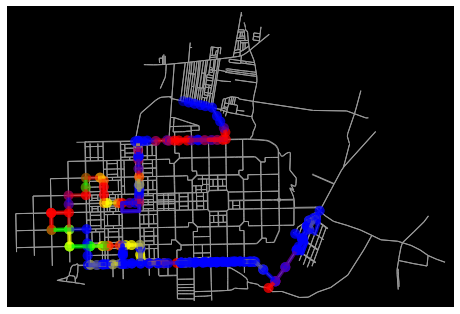

In [ ]:
fig, ax = ox.plot_graph_routes(G, route, route_colors=color, route_linewidth=2, node_size=0, bgcolor='k')

In [ ]:
color[0]

'#FFFF00'

In [ ]:
filepath = "/content/drive/MyDrive/data/graphfinal1.html"
m3=ox.plot_route_folium(G, route[0],tiles='openstreetmap', zoom_start = 4,color=color[0],weight=5)
for i in range(1,len(route)):
  m3 = ox.plot_route_folium(G, route[i], tiles='openstreetmap', zoom_start = 4,route_map=m3,popup_attribute="length", color=color[i],weight=5)
m3.save(filepath)

In [ ]:
def read_all_data(file):
   k=read_file(file)
   lat=k['lat'].values.flatten()
   lng=k['lng'].values.flatten()
   z=k['acc-z'].values.flatten()
   return z,lat,lng 

In [ ]:
file="/content/drive/MyDrive/data/actualldata.csv"
#file="/content/drive/MyDrive/data/data3.csv"
z_axis,lati,lngi=read_all_data(file)
num=len(z_axis)//300
humps=[]
potholes=[]
roughroad=[]
for i in range(num):
  data=z_axis[i*300:(i+1)*300]
  node=[lati[i*300],lngi[i*300]]
  k=2.*(data - np.mean(9.8065))/np.ptp(data)-1
  mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
  i=np.mean(mfccs.T,axis=0)
  p=route_type(i.reshape(1,-1))
  if(p==0):
    potholes.append(node)
  elif(p==2):
    humps.append(node)
  elif(p==3):
    roughroad.append(node)

file="/content/drive/MyDrive/data/data3.csv"
z_axis,lati,lngi=read_all_data(file)
num=len(z_axis)//300
for i in range(num):
  data=z_axis[i*300:(i+1)*300]
  node=[lati[i*300],lngi[i*300]]
  k=2.*(data - np.mean(9.8065))/np.ptp(data)-1
  mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
  i=np.mean(mfccs.T,axis=0)
  p=route_type(i.reshape(1,-1))
  if(p==0):
    potholes.append(node)
  elif(p==2):
    humps.append(node)
  elif(p==3):
    roughroad.append(node)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=300
  n_fft, y.shape[-1]


In [ ]:
file="/content/drive/MyDrive/data/data5.csv"
#file="/content/drive/MyDrive/data/data3.csv"
z_axis,lati,lngi=read_all_data(file)
num=len(z_axis)//300
for i in range(num):
  data=z_axis[i*300:(i+1)*300]
  node=[lati[i*300],lngi[i*300]]
  k=2.*(data - np.mean(9.8065))/np.ptp(data)-1
  mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
  i=np.mean(mfccs.T,axis=0)
  p=route_type(i.reshape(1,-1))
  if(p==0):
    potholes.append(node)
  elif(p==2):
    humps.append(node)
  elif(p==3):
    roughroad.append(node)

file="/content/drive/MyDrive/data/data6.csv"
z_axis,lati,lngi=read_all_data(file)
num=len(z_axis)//300
for i in range(num):
  data=z_axis[i*300:(i+1)*300]
  node=[lati[i*300],lngi[i*300]]
  k=2.*(data - np.mean(9.8065))/np.ptp(data)-1
  mfccs=librosa.feature.mfcc(y=k,sr=100,n_mfcc=100)
  i=np.mean(mfccs.T,axis=0)
  p=route_type(i.reshape(1,-1))
  if(p==0):
    potholes.append(node)
  elif(p==2):
    humps.append(node)
  elif(p==3):
    roughroad.append(node)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=300
  n_fft, y.shape[-1]


In [ ]:
humps

[[16.152055166666667, 75.647387],
 [16.152311, 75.64733183333334],
 [16.152354166666665, 75.64599183333333],
 [16.152321166666667, 75.6443765],
 [16.1522655, 75.64194233333333],
 [16.152256833333333, 75.64143016666667],
 [16.152209, 75.63905283333334],
 [16.152202833333334, 75.638922],
 [16.152192166666666, 75.63851383333333],
 [16.1521355, 75.63613783333334],
 [16.1545675, 75.6356625],
 [16.154868333333333, 75.63555833333334],
 [16.154786833333333, 75.6331155],
 [16.157130833333333, 75.63268916666667],
 [16.157424166666665, 75.63278233333334],
 [16.157545833333334, 75.6353345],
 [16.155177666666667, 75.63573533333333],
 [16.15488016666667, 75.63584316666666],
 [16.1549095, 75.638221],
 [16.1525485, 75.63870183333333],
 [16.149527, 75.64847716666667],
 [16.149591, 75.65328733333334],
 [16.14959066666667, 75.65339383333334],
 [16.149642333333333, 75.65603466666667],
 [16.149408833333332, 75.6667175],
 [16.149399166666665, 75.6667345],
 [16.149398666666666, 75.6667355],
 [16.145724666666

In [ ]:
def find_nearest_hump_pothole_wornoutroad(l,x):
  li=l
  print(l)
  for i in li:
    hum=[float(k)  for k in i.split("-")]
    dist=ox.distance.great_circle_vec(hum[0], hum[1], x[0], x[1], earth_radius=6371009);
    if(dist<=15):
      return False
  else:
    return True



In [ ]:
ox.distance.nearest_edges(G, i[0], i[1])

TypeError: ignored

In [ ]:
humps_d={}
potholes_d={}
roughroad_d={}
for i in humps:
  node=ox.get_nearest_edge(G,i, return_dist=False)
  #print(node)
  st=str(node[0])+"->"+str(node[1])
  l=humps_d.get(st,"")
  l=l.split(",")
  if(l[0]==""):
    l=[]
  if(find_nearest_hump_pothole_wornoutroad(l,i)):
    l.append(str(i[0])+"-"+str(i[1]))
  l=",".join(l)
  humps_d[st]=l
for i in potholes:
  node=ox.get_nearest_edge(G,i, return_dist=False)
  #print(node)
  st=str(node[0])+"->"+str(node[1])
  l=potholes_d.get(st,"")
  l=l.split(",")
  if(l[0]==""):
    l=[]
  if(find_nearest_hump_pothole_wornoutroad(l,i)):
    l.append(str(i[0])+"-"+str(i[1]))
  l=",".join(l)
  potholes_d[st]=l
for i in roughroad:
  node=ox.get_nearest_edge(G,i, return_dist=False)
  #print(node)
  st=str(node[0])+"->"+str(node[1])
  l=roughroad_d.get(st,"")
  l=l.split(",")
  if(l[0]==""):
    l=[]
  if(find_nearest_hump_pothole_wornoutroad(l,i)):
    l.append(str(i[0])+"-"+str(i[1]))
  l=",".join(l)
  roughroad_d[st]=l


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152055166666667-75.647387']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152209-75.63905283333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152192166666666-75.63851383333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.154868333333333-75.63555833333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.157130833333333-75.63268916666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.15488016666667-75.63584316666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149591-75.65328733333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149408833333332-75.6667175']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152321166666667-75.6443765']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1522655-75.64194233333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152256833333333-75.64143016666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152209-75.63905283333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152192166666666-75.63851383333333', '16.1521355-75.63613783333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152192166666666-75.63851383333333', '16.1521355-75.63613783333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1545675-75.6356625']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.154868333333333-75.63555833333334', '16.154786833333333-75.6331155']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.154868333333333-75.63555833333334', '16.154786833333333-75.6331155']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.157130833333333-75.63268916666667', '16.157424166666665-75.63278233333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159961833333334-75.63555116666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.160242-75.635741']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.163039-75.64101']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.163039-75.64101']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.167760333333334-75.64709283333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.167760333333334-75.64709283333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.167760333333334-75.64709283333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.173686166666666-75.65950366666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.175176166666667-75.65415866666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.175176166666667-75.65415866666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.175176166666667-75.65415866666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.175176166666667-75.65415866666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.175176166666667-75.65415866666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.162912666666667-75.64133766666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1581985-75.63859016666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1525485-75.63870183333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152055166666667-75.647387', '16.152311-75.64733183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.160236-75.6472175']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.165665666666666-75.6471375']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.168554-75.64704366666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.15490266666667-75.63736516666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1496575-75.65822916666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1561795-75.6751985']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.157771-75.6768985']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1496575-75.65822916666667', '16.149673333333332-75.65867466666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152320833333334-75.642516']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152256166666668-75.640524']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152209166666665-75.637876']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152209166666665-75.637876', '16.152211166666667-75.63772933333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152209166666665-75.637876', '16.152211166666667-75.63772933333334', '16.152192333333332-75.637025']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1548275-75.63564483333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1548275-75.63564483333333', '16.154837333333333-75.63378416666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.154915666666668-75.632795']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.160276333333332-75.6366515']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159953333333334-75.6413895']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1592605-75.64206883333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1677655-75.64709733333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149324666666665-75.63984']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.168973333333334-75.64977483333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149660333333333-75.65334416666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149716666666666-75.655992']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.15214466666667-75.63669033333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.154825833333334-75.6343135']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149459-75.64461033333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149459-75.64461033333333', '16.149456666666666-75.64487766666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256', '16.149468333333335-75.64568966666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256', '16.149468333333335-75.64568966666667', '16.1494735-75.64590883333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256', '16.149468333333335-75.64568966666667', '16.1494735-75.64590883333334', '16.149491833333332-75.6461255']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256', '16.149468333333335-75.64568966666667', '16.1494735-75.64590883333334', '16.149491833333332-75.6461255', '16.149504333333333-75.64695366666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14951616666667-75.64758733333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14951616666667-75.64758733333333', '16.1495235-75.648245']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14951616666667-75.64758733333333', '16.1495235-75.648245', '16.149522333333334-75.64868066666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149537833333333-75.64899833333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149537833333333-75.64899833333334', '16.1495515-75.6499075']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1495645-75.65149766666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1495645-75.65149766666667', '16.149567666666666-75.65172083333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149579166666665-75.6521745']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149579166666665-75.6521745', '16.149584333333333-75.65266266666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1496405-75.65638116666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149671166666668-75.658834']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149691333333333-75.65964383333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149709833333333-75.661972']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149709833333333-75.661972', '16.1497145-75.66217983333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149709833333333-75.661972', '16.1497145-75.66217983333334', '16.149771833333332-75.66415083333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14969333333333-75.66636966666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14969333333333-75.66636966666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333', '16.146762833333334-75.67081866666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333', '16.146762833333334-75.67081866666666', '16.146794333333332-75.670675']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333', '16.146762833333334-75.67081866666666', '16.146794333333332-75.670675']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333', '16.146762833333334-75.67081866666666', '16.146794333333332-75.670675', '16.146849-75.67041316666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333', '16.146762833333334-75.67081866666666', '16.146794333333332-75.670675', '16.146849-75.67041316666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333', '16.146762833333334-75.67081866666666', '16.146794333333332-75.670675', '16.146849-75.67041316666666', '16.146897-75.67015583333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333', '16.146762833333334-75.67081866666666', '16.146794333333332-75.670675', '16.146849-75.67041316666666', '16.146897-75.67015583333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.147078-75.67046033333334', '16.147023333333333-75.670699', '16.146969833333333-75.67095183333333', '16.1469315-75.67109516666666', '16.1468965-75.6712395', '16.146842666666668-75.67147216666666', '16.146810833333333-75.67160883333334', '16.146763833333335-75.6717495', '16.1467285-75.67190216666667', '16.1466915-75.67206016666667', '16.1466545-75.67219666666666', '16.146633166666668-75.671368', '16.146690666666668-75.671109', '16.146718666666665-75.67096433333333', '16.146762833333334-75.67081866666666', '16.146794333333332-75.670675', '16.146849-75.67041316666666', '16.146897-75.67015583333334', '16.146861-75.6699465']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156608-75.675873']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156608-75.675873']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156652833333332-75.6759735']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156652833333332-75.6759735', '16.156386333333334-75.67535683333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168', '16.155875666666667-75.67507516666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155624666666668-75.674979']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155265166666666-75.67483166666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.153622666666667-75.673787']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.153622666666667-75.673787']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1542225-75.67295816666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.154131333333332-75.67302666666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.153622666666667-75.673787', '16.153749333333334-75.673604']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.153622666666667-75.673787', '16.153749333333334-75.673604']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155265166666666-75.67483166666666', '16.154834833333332-75.67464616666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155265166666666-75.67483166666666', '16.154834833333332-75.67464616666666', '16.153962333333332-75.67428383333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155265166666666-75.67483166666666', '16.154834833333332-75.67464616666666', '16.153962333333332-75.67428383333333', '16.154226666666666-75.67439816666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155381333333334-75.674886', '16.155128666666666-75.67477366666667', '16.1549815-75.67471466666667', '16.1547145-75.67457966666667', '16.1545905-75.674517', '16.154444333333334-75.6744615', '16.154179666666668-75.67433750000001', '16.1540385-75.67428783333334', '16.1538975-75.67422083333334', '16.153761-75.67416416666667', '16.153556-75.67406183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168', '16.155875666666667-75.67507516666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168', '16.155875666666667-75.67507516666667', '16.155450166666668-75.67488216666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168', '16.155875666666667-75.67507516666667', '16.155450166666668-75.67488216666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168', '16.155875666666667-75.67507516666667', '16.155450166666668-75.67488216666666', '16.155713-75.674975']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168', '16.155875666666667-75.67507516666667', '16.155450166666668-75.67488216666666', '16.155713-75.674975']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168', '16.155875666666667-75.67507516666667', '16.155450166666668-75.67488216666666', '16.155713-75.674975']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.155624666666668-75.674979']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156274833333335-75.67522333333334', '16.156086333333334-75.675168', '16.155875666666667-75.67507516666667', '16.155450166666668-75.67488216666666', '16.155713-75.674975']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156652833333332-75.6759735', '16.156386333333334-75.67535683333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156608-75.675873', '16.156479166666667-75.675561']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156608-75.675873', '16.156479166666667-75.675561', '16.156415-75.67540616666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156608-75.675873', '16.156479166666667-75.675561', '16.156415-75.67540616666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156608-75.675873', '16.156479166666667-75.675561', '16.156415-75.67540616666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.156652833333332-75.6759735', '16.156386333333334-75.67535683333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1517815-75.67315283333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.150358833333332-75.672437']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1471035-75.67034633333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1471035-75.67034633333333', '16.147303333333333-75.6702545']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149505666666666-75.66658783333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149505666666666-75.66658783333334', '16.149360666666666-75.66679266666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1498025-75.66617933333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149709833333333-75.661972', '16.1497145-75.66217983333334', '16.149771833333332-75.66415083333334', '16.149778166666668-75.66435166666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149709833333333-75.661972', '16.1497145-75.66217983333334', '16.149771833333332-75.66415083333334', '16.149778166666668-75.66435166666666', '16.149717166666665-75.66396733333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149709833333333-75.661972', '16.1497145-75.66217983333334', '16.149771833333332-75.66415083333334', '16.149778166666668-75.66435166666666', '16.149717166666665-75.66396733333333', '16.149711-75.66336716666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149709833333333-75.661972', '16.1497145-75.66217983333334', '16.149771833333332-75.66415083333334', '16.149778166666668-75.66435166666666', '16.149717166666665-75.66396733333333', '16.149711-75.66336716666666', '16.149708666666665-75.66317866666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149639166666667-75.659159']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149671166666668-75.658834']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149671166666668-75.658834', '16.149626833333333-75.65897433333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1496405-75.65638116666666', '16.149635-75.65677766666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1496405-75.65638116666666', '16.149635-75.65677766666667', '16.1495985-75.65738583333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14964-75.65620333333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14964-75.65620333333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14964-75.65620333333334', '16.14956816666667-75.65532366666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149629-75.65471833333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1495955-75.65352933333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1495955-75.65352933333334', '16.149547166666668-75.65423483333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1495955-75.65352933333334', '16.149547166666668-75.65423483333333', '16.149534833333334-75.65382433333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149579166666665-75.6521745', '16.149584333333333-75.65266266666667', '16.1495915-75.65347033333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14951616666667-75.64758733333333', '16.1495235-75.648245', '16.149522333333334-75.64868066666666', '16.149532333333333-75.64885']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14951616666667-75.64758733333333', '16.1495235-75.648245', '16.149522333333334-75.64868066666666', '16.149532333333333-75.64885']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.14951616666667-75.64758733333333', '16.1495235-75.648245', '16.149522333333334-75.64868066666666', '16.149532333333333-75.64885', '16.149459166666666-75.64786716666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256', '16.149468333333335-75.64568966666667', '16.1494735-75.64590883333334', '16.149491833333332-75.6461255', '16.149504333333333-75.64695366666666', '16.149510166666666-75.64717883333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256', '16.149468333333335-75.64568966666667', '16.1494735-75.64590883333334', '16.149491833333332-75.6461255', '16.149504333333333-75.64695366666666', '16.149510166666666-75.64717883333333', '16.1494565-75.64745866666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256', '16.149468333333335-75.64568966666667', '16.1494735-75.64590883333334', '16.149491833333332-75.6461255', '16.149504333333333-75.64695366666666', '16.149510166666666-75.64717883333333', '16.1494565-75.64745866666667', '16.149456666666666-75.64658266666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149460333333334-75.645256', '16.149468333333335-75.64568966666667', '16.1494735-75.64590883333334', '16.149491833333332-75.6461255', '16.149504333333333-75.64695366666666', '16.149510166666666-75.64717883333333', '16.1494565-75.64745866666667', '16.149456666666666-75.64658266666666', '16.149456833333332-75.64637216666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152335333333333-75.64462816666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.15214466666667-75.63669033333333', '16.152238666666666-75.6358165']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152808833333335-75.63571633333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152808833333335-75.63571633333333', '16.152992-75.63571116666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152808833333335-75.63571633333333', '16.152992-75.63571116666667', '16.153857833333333-75.63568416666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.152358333333332-75.63574183333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.154825833333334-75.6343135', '16.154813833333332-75.63409566666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.154825833333334-75.6343135', '16.154813833333332-75.63409566666667', '16.154872333333334-75.63492583333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.158827833333334-75.632817']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.158827833333334-75.632817']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.158827833333334-75.632817', '16.158875-75.63323283333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1589045-75.63521916666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159801166666668-75.64139133333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159801166666668-75.64139133333333', '16.159469166666668-75.641399']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159121166666665-75.64288']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159121166666665-75.64288', '16.1591105-75.64307633333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159121166666665-75.64288', '16.1591105-75.64307633333334', '16.159104666666668-75.6432795']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159095166666667-75.64387366666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.159101833333334-75.64442433333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.168422-75.64705466666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.168932-75.64933483333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.168941833333335-75.65014883333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.168941833333335-75.65014883333333', '16.168961-75.65187133333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.168966333333334-75.65270666666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1689675-75.6531225']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1689975-75.65460866666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.171504166666665-75.66073716666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.171504166666665-75.66073716666666', '16.171706-75.66062166666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1720955-75.66040616666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.174489-75.657708']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.161894666666665-75.641359']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.169156833333332-75.64807733333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.169156833333332-75.64807733333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.169156833333332-75.64807733333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1688375-75.6451525']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1688375-75.6451525', '16.168837166666666-75.64493033333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1688375-75.6451525', '16.168837166666666-75.64493033333333', '16.168839-75.64451783333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149514333333332-75.647389']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149514333333332-75.647389', '16.149572833333334-75.64701066666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.169156833333332-75.64807733333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.149667333333333-75.65354883333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.151240333333334-75.65621783333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.151240333333334-75.65621783333333']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.158767-75.66743']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.158391166666668-75.667445']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1582355-75.66916166666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1632335-75.67020183333334']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.166685333333334-75.67015866666667']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.1691375-75.666051']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


['16.173245333333334-75.66301116666666']


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:387: UserWarning: The `get_nearest_edge` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))


[]


In [ ]:
file_hump=open("/content/drive/MyDrive/data/humps1.txt",'w')
for x,y in humps_d.items():
  file_hump.write(x+" "+y+"\n")
file_hump.close()
file_hump=open("/content/drive/MyDrive/data/potholes1.txt",'w')
for x,y in potholes_d.items():
  file_hump.write(x+" "+y+"\n")
file_hump.close()
file_hump=open("/content/drive/MyDrive/data/worn_out1.txt",'w')
for x,y in roughroad_d.items():
  file_hump.write(x+" "+y+"\n")
file_hump.close()

In [ ]:
filepath = "/content/drive/MyDrive/data/graphfinal2.html"
m3=ox.plot_route_folium(G, route[0],tiles='openstreetmap', zoom_start = 4,color=color[0],weight=5)
for i in range(1,len(route)):
  m3 = ox.plot_route_folium(G, route[i], tiles='openstreetmap', zoom_start = 4,route_map=m3,popup_attribute="length", color=color[i],weight=5)
for i in humps:
  node=ox.nearest_edges(G, i[1],i[0])
  m3 = ox.plot_route_folium(G,[node[0]], tiles='openstreetmap', zoom_start = 4,route_map=m3,popup_attribute="length", color="#ffffff",weight=30)
m3.save(filepath)

In [ ]:
import folium
filepath = "/content/drive/MyDrive/data/graphfinal3.html"
m3=ox.plot_route_folium(G, route[0],tiles='openstreetmap', zoom_start = 4,color=color[0],weight=5)
for i in range(1,len(route)):
  m3 = ox.plot_route_folium(G, route[i], tiles='openstreetmap', zoom_start = 4,route_map=m3,popup_attribute="length", color=color[i],weight=5)
folium.TileLayer('openstreetmap').add_to(m3)
folium.TileLayer('Stamen Terrain').add_to(m3)
folium.TileLayer('Stamen Toner').add_to(m3)
folium.TileLayer('Stamen Water Color').add_to(m3)
folium.TileLayer('cartodbpositron').add_to(m3)
folium.TileLayer('cartodbdark_matter').add_to(m3)
folium.LayerControl().add_to(m3)
for x,y in humps_d.items():
  l=y.split(",")
  for k in l:
    p=k.split("-")
    # print(p)
    start_latlng = (float(p[0]),float(p[1]))
    start_marker = folium.Marker(
              location = start_latlng,
              popup = "Hump",
              icon = folium.Icon(color='green'))
    start_marker.add_to(m3)
for x,y in potholes_d.items():
  l=y.split(",")
  for k in l:
    p=k.split("-")
    # print(p)
    start_latlng = (float(p[0]),float(p[1]))
    start_marker = folium.Marker(
              location = start_latlng,
              popup = "PotHole",
              icon = folium.Icon(color='red'))
    start_marker.add_to(m3)

m3.save(filepath)
m3

In [ ]:

for x,y in humps_d.items():
  node12=x.split("->")
  node0 = G.nodes(data=True)[int(node12[0])]
  lat1=node0['x']
  lng1=node0['y']
  node0 = G.nodes(data=True)[int(node12[1])]
  lat2=node0['x']
  lng2=node0['y']
  distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
  print(x,len(y.split("-")),distance)

print("\n\npotholes\n\n")
for x,y in potholes_d.items():
  node12=x.split("->")
  node0 = G.nodes(data=True)[int(node12[0])]
  lat1=node0['x']
  lng1=node0['y']
  node0 = G.nodes(data=True)[int(node12[1])]
  lat2=node0['x']
  lng2=node0['y']
  distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
  print(x,len(y.split("-")),distance)

print("\n\nwornoutholes\n\n")
for x,y in roughroad_d.items():
  node12=x.split("->")
  node0 = G.nodes(data=True)[int(node12[0])]
  lat1=node0['x']
  lng1=node0['y']
  node0 = G.nodes(data=True)[int(node12[1])]
  lat2=node0['x']
  lng2=node0['y']
  distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
  print(x,len(y.split("-")),distance)


2581715411->2581715428 3 12.762089037252405
2581715421->2581715423 2 105.20301412567653
2581715418->2581918228 2 45.503009106011575
2581918222->2581918224 2 51.62923935758383
2581918220->2581918222 2 47.080609686031465
2581918216->2581918212 2 45.66842258710552
2581918208->2581918210 3 320.23160697603646
2581918208->2581918359 2 74.20021802136216
2581918355->2581918359 3 323.56015264195815
2581918355->2581918376 3 74.6052874982661
2581918378->2581918376 2 324.4267907975603
2581918359->2581918378 2 74.3846861359115
2581918359->2581918365 3 319.0344279736246
2581918238->2581918212 2 12.69448390026831
2581918064->2581085969 2 153.91831035915254
2581715327->2581918066 2 166.25996434180112
2581816484->2581872949 2 155.78556745339077
2581816502->2581816473 2 150.8407875539355
2581816473->2581816502 2 150.8407875539355
1151523043->1422071281 2 129.02765522260304
1151522952->1422071281 2 192.3515590491597
1151523274->2307604145 2 139.63979048363342
1151523247->1151523274 2 73.58630711419778
14